# MobileNetV2 Experiments

## Import dependencies

In [2]:
from random    import seed; seed(42)
from configs   import DataConfig, ModelConfig
from pipelines import Data, Model

## Load the dataset and prepare it


In [3]:
data_config = DataConfig()
data        = Data(data_config)

data.load()

splits      = data.prepare()
classes     = splits[-1]

## Initialize the model and display its architecture

Choosing by `blocks` for the finetuning phase.

In [4]:
model_config = ModelConfig(type="mobilenet", by="blocks", classes=classes)

model        = Model(model_config)

model.build()

model.summary()

Total layers in model: 4
Base model trainable : False
Trainable weights    : 2
Non-trainable weights: 260


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)           │ (32, 224, 224, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ mobilenetv2_1.00_224 (Functional)    │ (32, 7, 7, 1280)            │       2,257,984 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d             │ (32, 1280)                  │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (32, 5)                     │           6,405 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,264,389 (8.64 MB)

 Trainable params: 6,405 (25.02 KB)

 Non-trainable params: 2,257,984 (8.61 MB)

## Start the model training loop


In [5]:
model.compile()

train = model.train(splits=(splits[0], splits[1]))

Epoch 1/3
86/86 ━━━━━━━━━━━━━━━━━━━━ 22s 129ms/step - accuracy: 0.5109 - f1_score: 0.4982 - loss: 1.3285 - precision: 0.5885 - recall: 0.4060 - val_accuracy: 0.6171 - val_f1_score: 0.6063 - val_loss: 1.1461 - val_precision: 0.6667 - val_recall: 0.5808
Epoch 2/3
86/86 ━━━━━━━━━━━━━━━━━━━━ 4s 42ms/step - accuracy: 0.6780 - f1_score: 0.6736 - loss: 0.9683 - precision: 0.7181 - recall: 0.6387 - val_accuracy: 0.6824 - val_f1_score: 0.6647 - val_loss: 0.9351 - val_precision: 0.7308 - val_recall: 0.6552
Epoch 3/3
86/86 ━━━━━━━━━━━━━━━━━━━━ 4s 43ms/step - accuracy: 0.7554 - f1_score: 0.7496 - loss: 0.6844 - precision: 0.7929 - recall: 0.7218 - val_accuracy: 0.7169 - val_f1_score: 0.7175 - val_loss: 0.7871 - val_precision: 0.7616 - val_recall: 0.6842


### Visualize the training and validation metrics

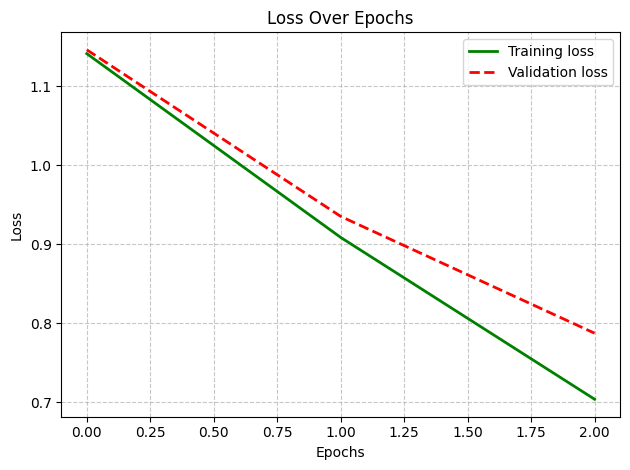

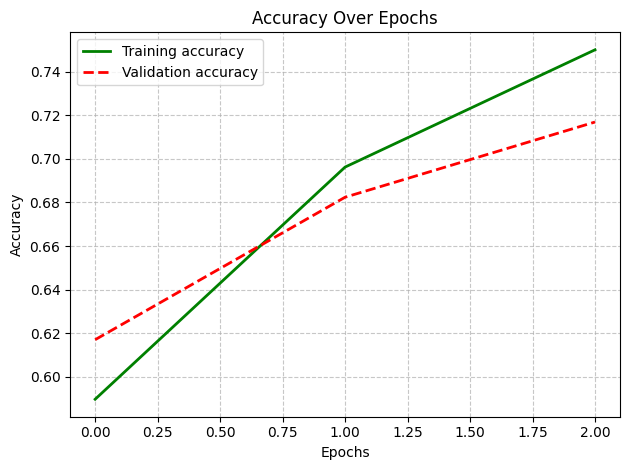

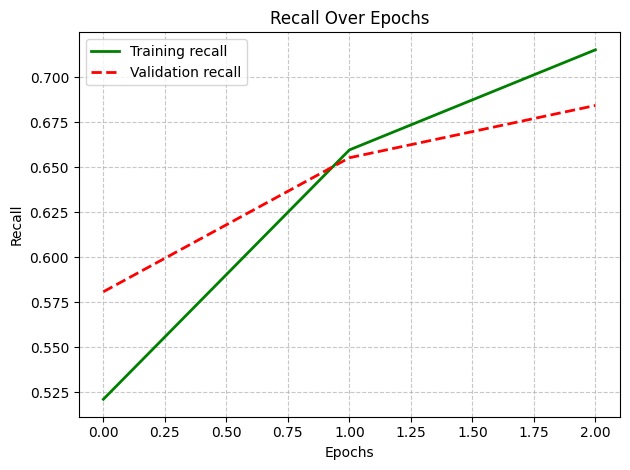

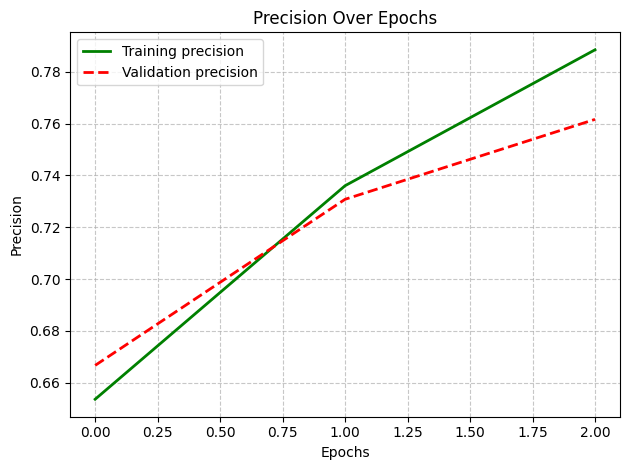

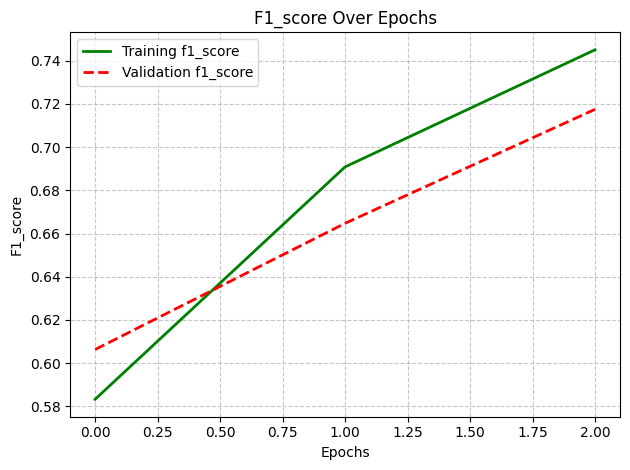

In [9]:
model.visualize_performance(history=train, metric="loss")
model.visualize_performance(history=train, metric="accuracy")
model.visualize_performance(history=train, metric="recall")
model.visualize_performance(history=train, metric="precision")
model.visualize_performance(history=train, metric="f1_score")

### Evaluate the model on the test set and display some predictions

12/12 ━━━━━━━━━━━━━━━━━━━━ 4s 353ms/step - accuracy: 0.7574 - f1_score: 0.7503 - loss: 0.8227 - precision: 0.7813 - recall: 0.7188
----------------
Loss     : 0.88
Accuracy : 0.73
Recall   : 0.68
Precision: 0.76
F1 score : 0.73
----------------
12/12 ━━━━━━━━━━━━━━━━━━━━ 7s 361ms/step


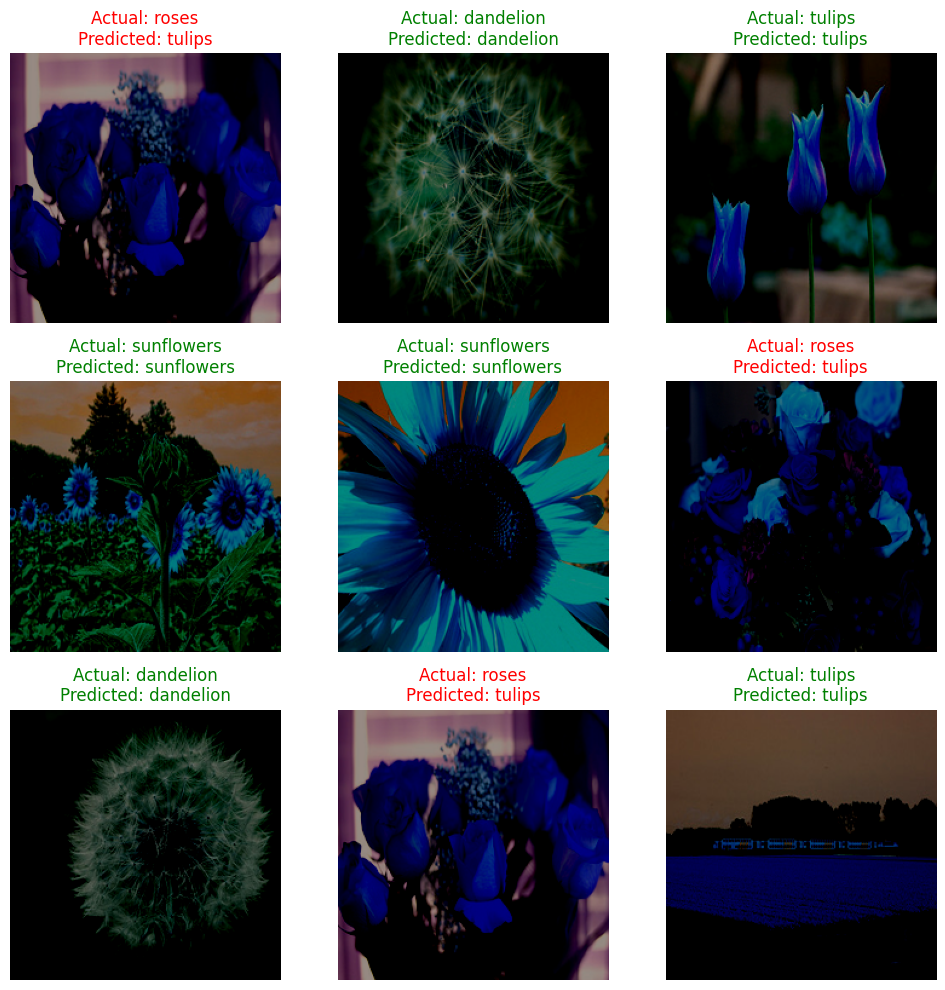

In [6]:
metrics = model.evaluate(splits=(splits[2]))

### Visualize the misclassified images


12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


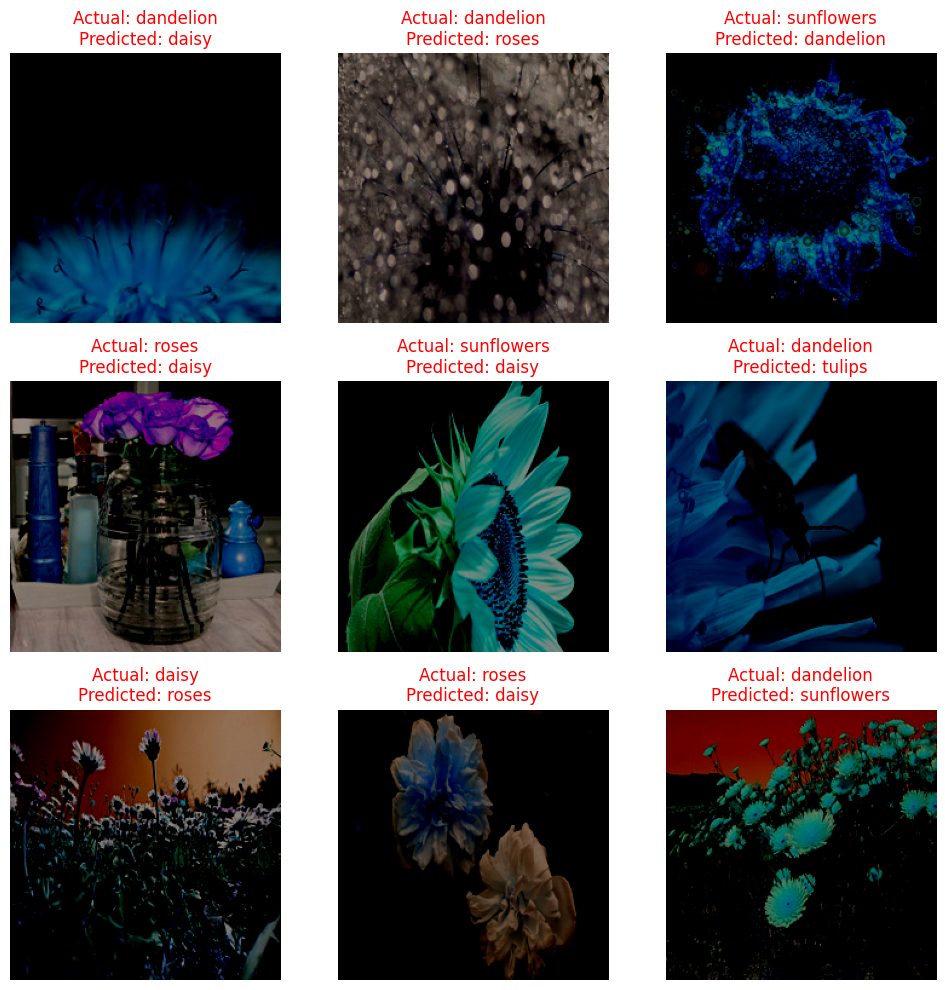

In [7]:
model.visualize_misclassifications(splits=(splits[2]))

### Display the confusion matrix and identify common misclassifications

12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


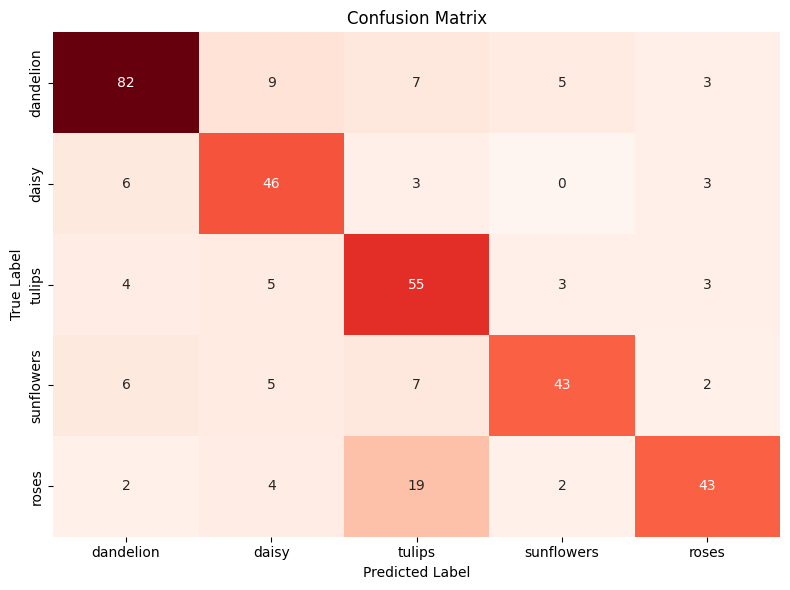

In [8]:
model.visualize_confusion_matrix(splits=(splits[2]))

## Start the model finetuning loop

In [10]:
finetune = model.finetune(splits=(splits[0], splits[1]))

Trainable layers      : ['global_average_pooling2d', 'dense', 'block_15_expand', 'block_15_expand_BN', 'block_15_expand_relu', 'block_15_depthwise', 'block_15_depthwise_BN', 'block_15_depthwise_relu', 'block_15_project', 'block_15_project_BN', 'block_15_add', 'block_16_expand', 'block_16_expand_BN', 'block_16_expand_relu', 'block_16_depthwise', 'block_16_depthwise_BN', 'block_16_depthwise_relu', 'block_16_project', 'block_16_project_BN']
Total trainable layers: 19
Epoch 1/5
86/86 ━━━━━━━━━━━━━━━━━━━━ 16s 124ms/step - accuracy: 0.6010 - f1_score: 0.5876 - loss: 1.0865 - precision: 0.6643 - recall: 0.5025 - val_accuracy: 0.7241 - val_f1_score: 0.7259 - val_loss: 0.7720 - val_precision: 0.7757 - val_recall: 0.6842
Epoch 2/5
86/86 ━━━━━━━━━━━━━━━━━━━━ 4s 42ms/step - accuracy: 0.6021 - f1_score: 0.5867 - loss: 1.1046 - precision: 0.6703 - recall: 0.5097 - val_accuracy: 0.7350 - val_f1_score: 0.7353 - val_loss: 0.7660 - val_precision: 0.7832 - val_recall: 0.6951
Epoch 3/5
86/86 ━━━━━━━━━━━━━

### Visualize the training and validation metrics

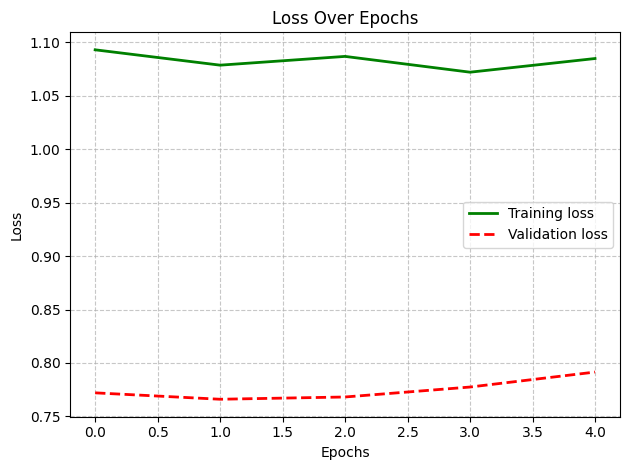

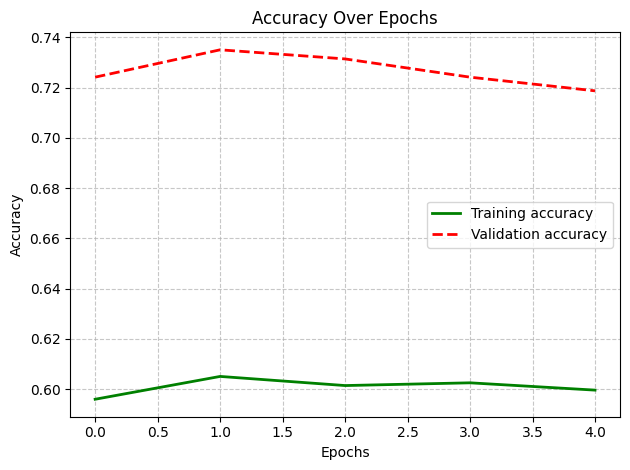

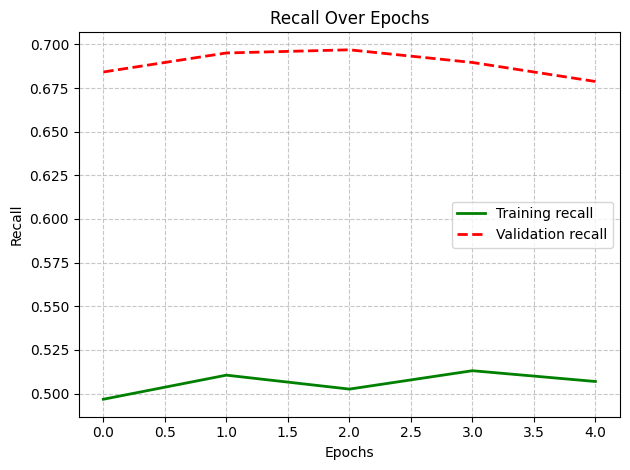

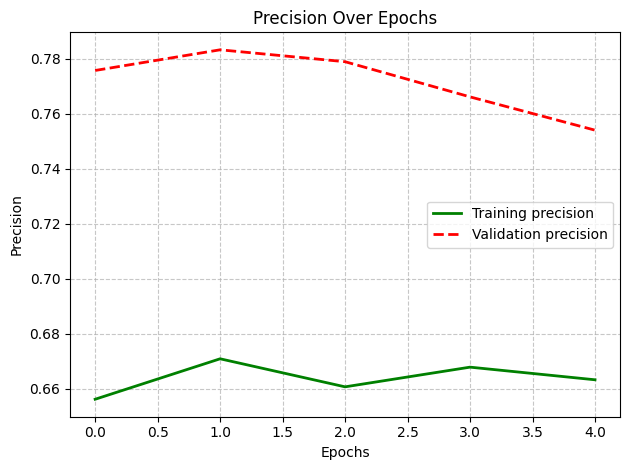

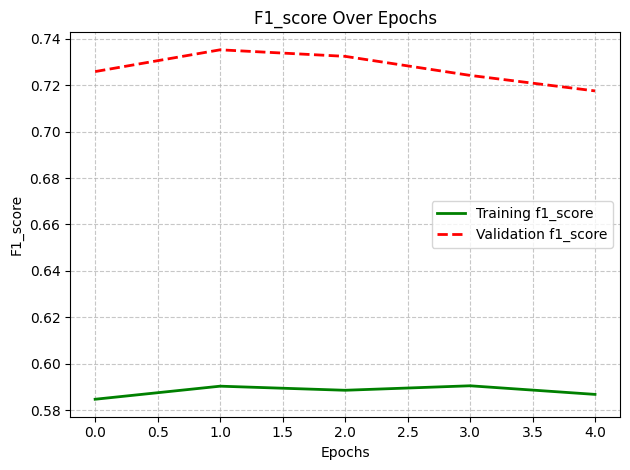

In [14]:
model.visualize_performance(history=finetune, metric="loss")
model.visualize_performance(history=finetune, metric="accuracy")
model.visualize_performance(history=finetune, metric="recall")
model.visualize_performance(history=finetune, metric="precision")
model.visualize_performance(history=finetune, metric="f1_score")

### Evaluate the model on the test set and display some predictions

12/12 ━━━━━━━━━━━━━━━━━━━━ 3s 222ms/step - accuracy: 0.7646 - f1_score: 0.7592 - loss: 0.8203 - precision: 0.8146 - recall: 0.7364
----------------
Loss     : 0.86
Accuracy : 0.75
Recall   : 0.71
Precision: 0.80
F1 score : 0.74
----------------
12/12 ━━━━━━━━━━━━━━━━━━━━ 6s 280ms/step


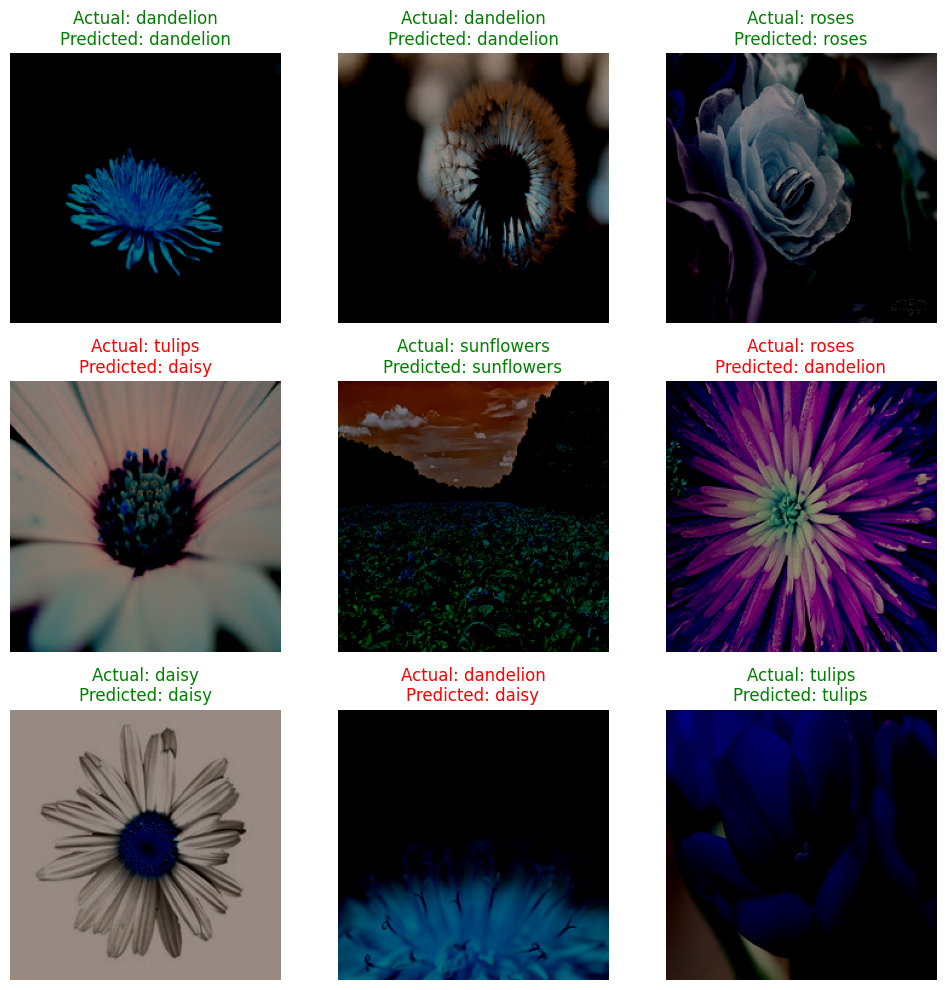

In [11]:
metrics = model.evaluate(splits=(splits[2]))

### Visualize the misclassified images

12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


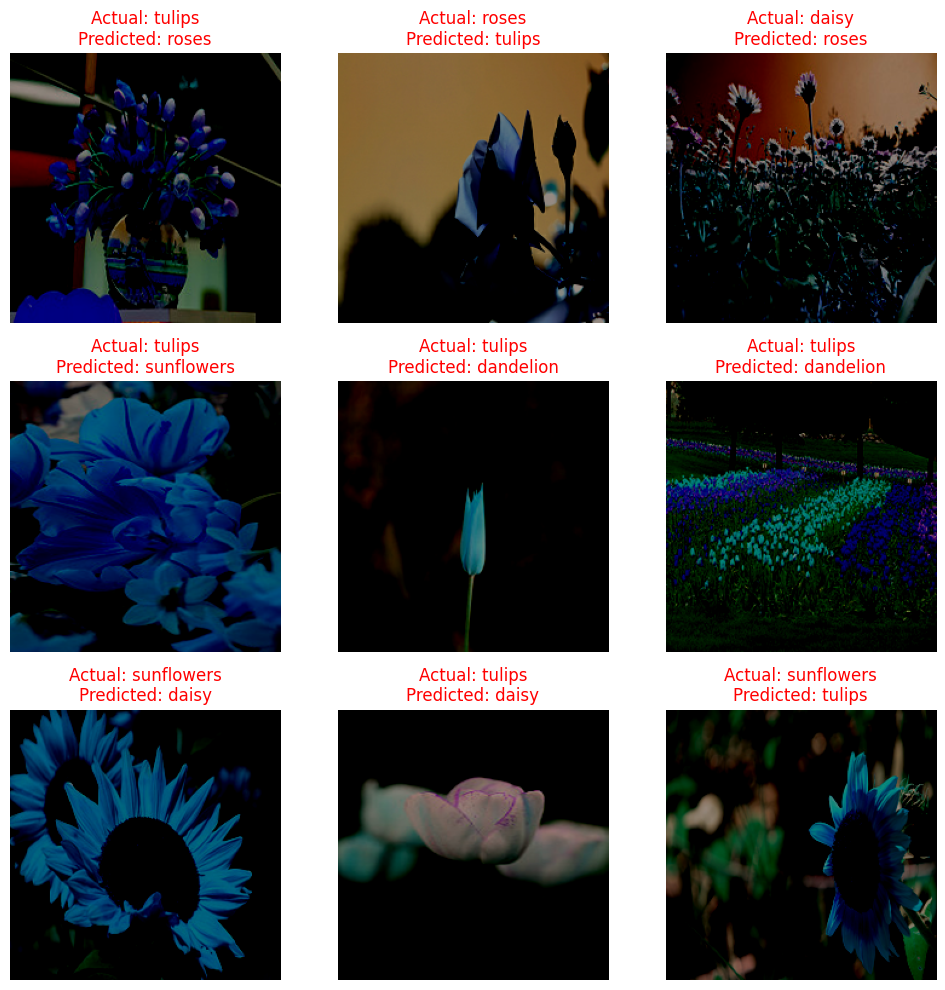

In [12]:
model.visualize_misclassifications(splits=(splits[2]))

### Display the confusion matrix and identify common misclassifications

12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 46ms/step


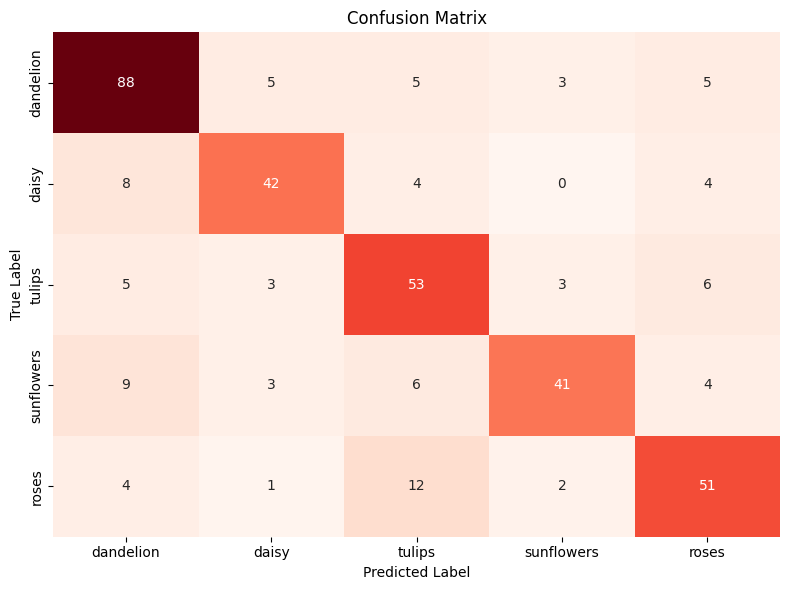

In [13]:
model.visualize_confusion_matrix(splits=(splits[2]))

## Initialize the model and display its architecture

Choosing by `layers` for the finetuning phase.

In [16]:
model_config = ModelConfig(type="mobilenet", by="layers", classes=classes)

model        = Model(model_config)

model.build()

model.summary()

Total layers in model: 4
Base model trainable : False
Trainable weights    : 2
Non-trainable weights: 260


Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_5 (InputLayer)           │ (32, 224, 224, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ mobilenetv2_1.00_224 (Functional)    │ (32, 7, 7, 1280)            │       2,257,984 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d_2           │ (32, 1280)                  │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (32, 5)                     │           6,405 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,264,389 (8.64 MB)

 Trainable params: 6,405 (25.02 KB)

 Non-trainable params: 2,257,984 (8.61 MB)

## Start the model training loop


In [17]:
model.compile()

train = model.train(splits=(splits[0], splits[1]))

Epoch 1/3
86/86 ━━━━━━━━━━━━━━━━━━━━ 18s 125ms/step - accuracy: 0.4831 - f1_score: 0.4736 - loss: 1.4358 - precision: 0.5507 - recall: 0.4049 - val_accuracy: 0.6751 - val_f1_score: 0.6741 - val_loss: 0.9040 - val_precision: 0.7538 - val_recall: 0.6225
Epoch 2/3
86/86 ━━━━━━━━━━━━━━━━━━━━ 4s 42ms/step - accuracy: 0.7031 - f1_score: 0.6996 - loss: 0.8865 - precision: 0.7464 - recall: 0.6648 - val_accuracy: 0.6915 - val_f1_score: 0.6811 - val_loss: 0.9140 - val_precision: 0.7309 - val_recall: 0.6606
Epoch 3/3
86/86 ━━━━━━━━━━━━━━━━━━━━ 6s 50ms/step - accuracy: 0.7410 - f1_score: 0.7361 - loss: 0.7279 - precision: 0.7724 - recall: 0.7070 - val_accuracy: 0.6987 - val_f1_score: 0.6963 - val_loss: 0.9022 - val_precision: 0.7374 - val_recall: 0.6624


## Start the model finetuning loop


In [19]:
finetune = model.finetune(splits=(splits[0], splits[1]))

Trainable layers      : ['input_layer_5', 'global_average_pooling2d_2', 'dense_2']
Total trainable layers: 3
Epoch 1/5
86/86 ━━━━━━━━━━━━━━━━━━━━ 18s 126ms/step - accuracy: 0.7862 - f1_score: 0.7835 - loss: 0.5834 - precision: 0.8238 - recall: 0.7454 - val_accuracy: 0.7024 - val_f1_score: 0.6996 - val_loss: 0.8392 - val_precision: 0.7505 - val_recall: 0.6661
Epoch 2/5
86/86 ━━━━━━━━━━━━━━━━━━━━ 11s 41ms/step - accuracy: 0.8103 - f1_score: 0.8060 - loss: 0.5503 - precision: 0.8444 - recall: 0.7792 - val_accuracy: 0.7350 - val_f1_score: 0.7330 - val_loss: 0.7676 - val_precision: 0.7824 - val_recall: 0.7114
Epoch 3/5
86/86 ━━━━━━━━━━━━━━━━━━━━ 5s 44ms/step - accuracy: 0.8247 - f1_score: 0.8204 - loss: 0.4772 - precision: 0.8566 - recall: 0.7961 - val_accuracy: 0.6770 - val_f1_score: 0.6679 - val_loss: 0.9947 - val_precision: 0.7033 - val_recall: 0.6279
Epoch 4/5
86/86 ━━━━━━━━━━━━━━━━━━━━ 4s 41ms/step - accuracy: 0.8171 - f1_score: 0.8143 - loss: 0.5015 - precision: 0.8468 - recall: 0.784

### Visualize the training and validation metrics

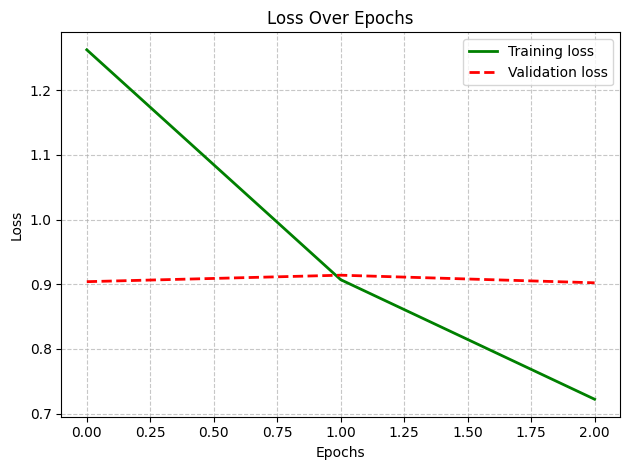

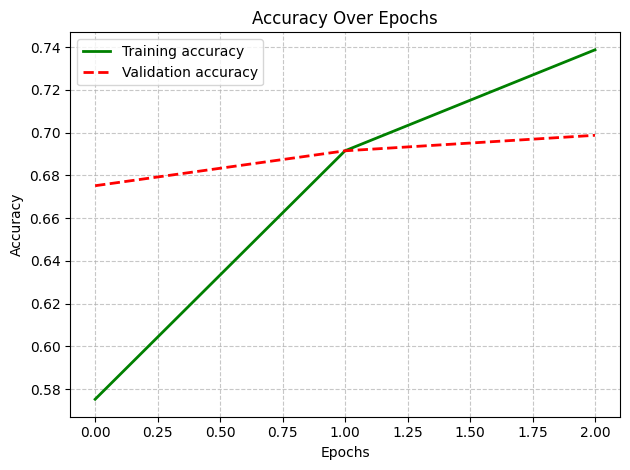

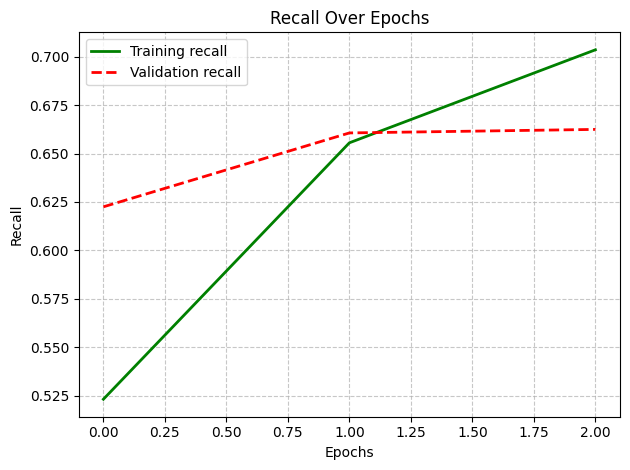

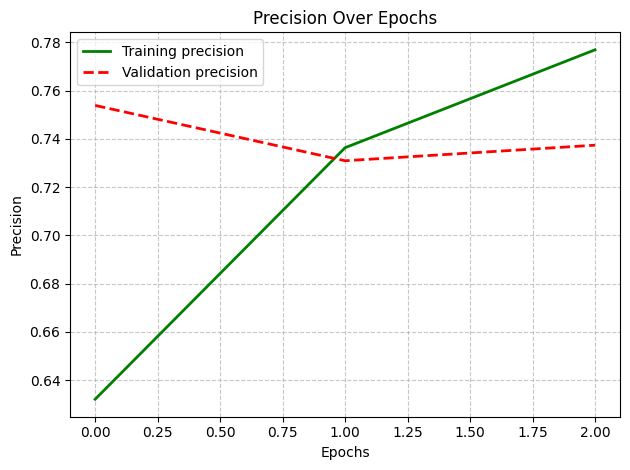

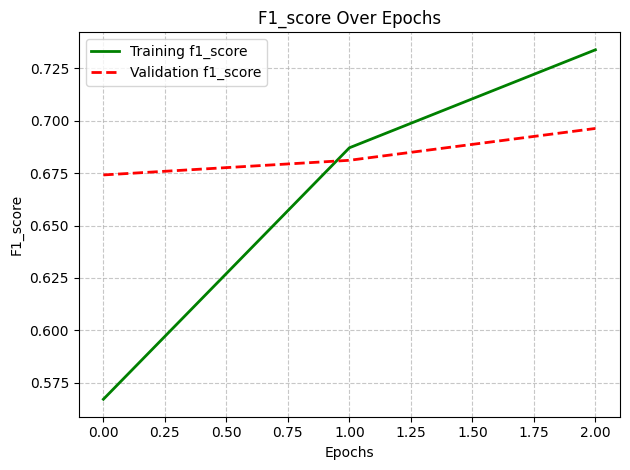

In [23]:
model.visualize_performance(history=train, metric="loss")
model.visualize_performance(history=train, metric="accuracy")
model.visualize_performance(history=train, metric="recall")
model.visualize_performance(history=train, metric="precision")
model.visualize_performance(history=train, metric="f1_score")

### Evaluate the model on the test set and display some predictions

12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 208ms/step - accuracy: 0.7164 - f1_score: 0.7056 - loss: 0.9600 - precision: 0.7398 - recall: 0.6781
----------------
Loss     : 1.00
Accuracy : 0.70
Recall   : 0.66
Precision: 0.72
F1 score : 0.69
----------------
12/12 ━━━━━━━━━━━━━━━━━━━━ 7s 298ms/step


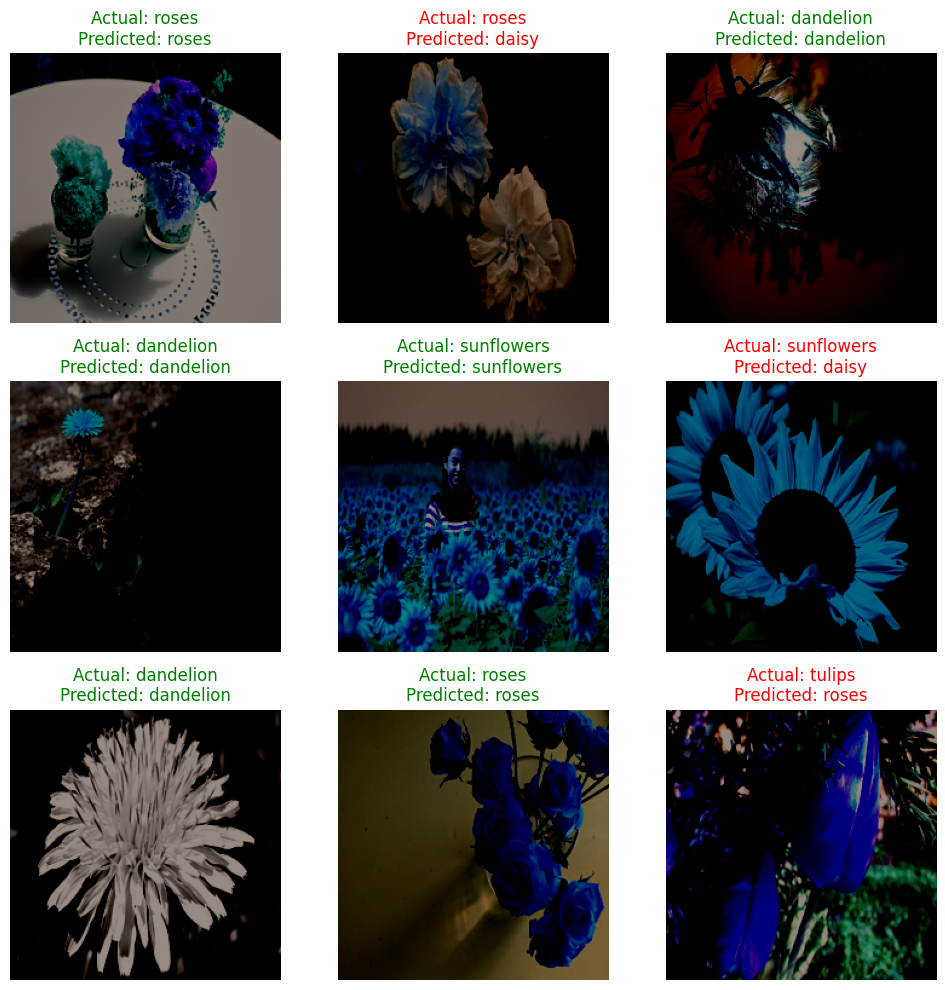

In [20]:
metrics = model.evaluate(splits=(splits[2]))

### Visualize the misclassified images


12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


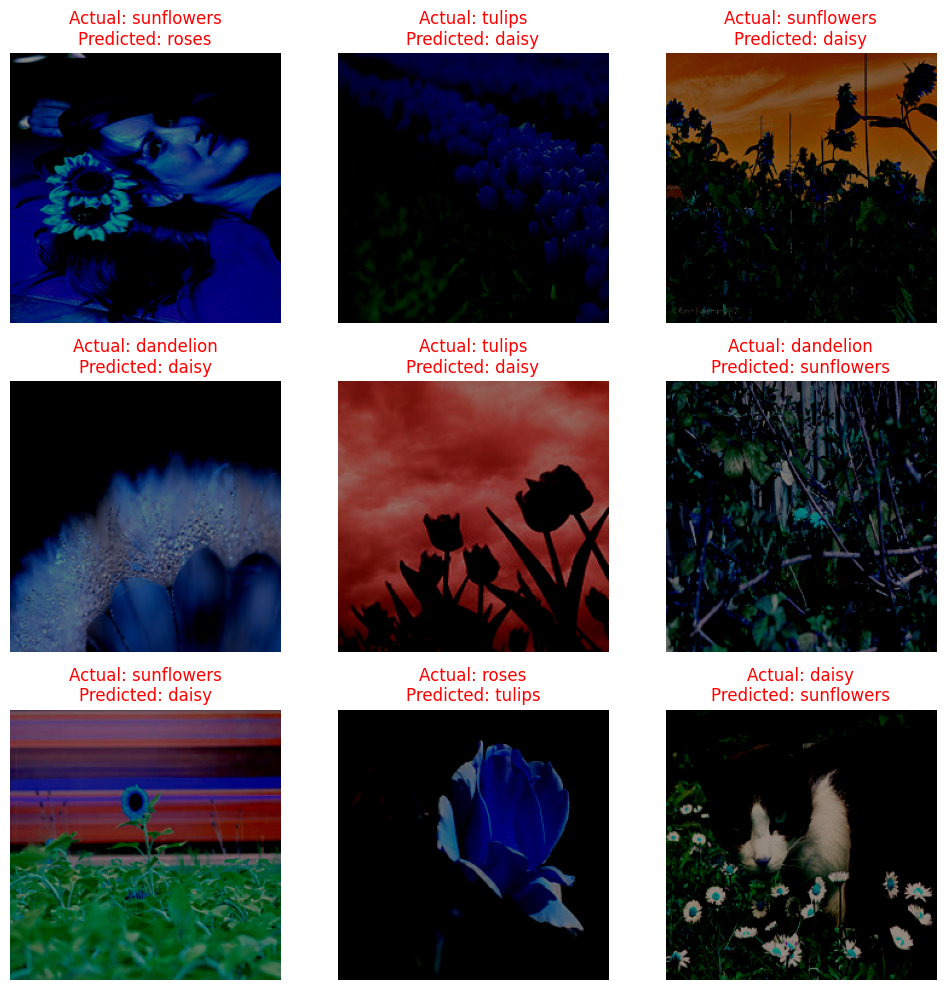

In [21]:
model.visualize_misclassifications(splits=(splits[2]))

### Display the confusion matrix and identify common misclassifications

12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


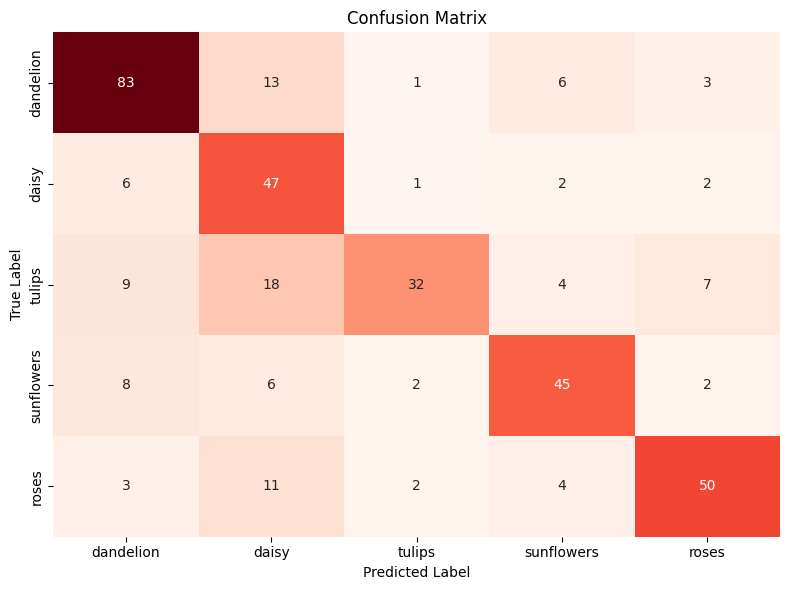

In [22]:
model.visualize_confusion_matrix(splits=(splits[2]))